# Read a Supoku table using Opencv

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator

import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'


### using the webcam to import the sudoku puzzle:

In [43]:
# cap = cv2.VideoCapture(0)

# while True:
#     success, img = cap.read()
#     cv2.imshow("video", img)
#     if cv2.waitKey(1) & 0xFF == ord("q"):
#         break
    

### import a saved image of a suduko puzzle:

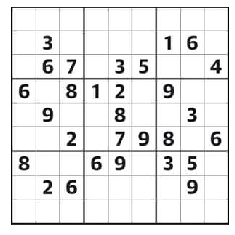

In [44]:
img = cv2.imread('Resources/first.jpg')
plt.imshow(img)
plt.xticks([]), plt.yticks([]);

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [24]:
proc = cv2.GaussianBlur(gray, (9, 9), 0)
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [28]:
proc = cv2.bitwise_not(proc, proc)  
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
proc = cv2.dilate(proc, kernel)
#plt.imshow(proc)

In [30]:
_, contours, h = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]

In [33]:
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))

In [34]:
[polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]]

[array([0, 0], dtype=int32),
 array([299,   0], dtype=int32),
 array([299, 299], dtype=int32),
 array([  0, 299], dtype=int32)]

In [58]:
def distance_between(p1, p2):
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))

In [60]:
#top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]

src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32') 
side = max([distance_between(bottom_right, top_right), distance_between(top_left, bottom_left),\
            distance_between(bottom_right, bottom_left),distance_between(top_left, top_right) ])

TypeError: 'int' object is not subscriptable

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

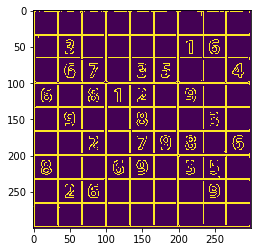

In [47]:
#cv2.imshow('edges', edges)
plt.imshow(edges)

In [48]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)


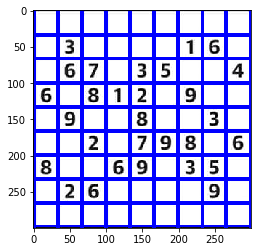

In [49]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


# cv2.imshow('image', img)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img)

In [59]:

img = cv2.imread('Resources/first.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(pytesseract.image_to_string(img))

hImg, wImg = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    print(b)
    b = b.split(' ')
    print(b)
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
    cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)

cv2.imshow("test", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

~ 0 297 0 300 0
['~', '0', '297', '0', '300', '0']
6 275 108 289 127 0
['6', '275', '108', '289', '127', '0']
~ 0 264 0 267 0
['~', '0', '264', '0', '267', '0']
1 203 233 220 259 0
['1', '203', '233', '220', '259', '0']
/ 233 235 234 260 0
['/', '233', '235', '234', '260', '0']
6 242 240 257 259 0
['6', '242', '240', '257', '259', '0']
| 233 139 234 164 0
['|', '233', '139', '234', '164', '0']
3 243 140 256 160 0
['3', '243', '140', '256', '160', '0']
3 210 73 223 93 0
['3', '210', '73', '223', '93', '0']
| 233 68 234 93 0
['|', '233', '68', '234', '93', '0']
5 243 74 256 93 0
['5', '243', '74', '256', '93', '0']
( 233 36 234 61 0
['(', '233', '36', '234', '61', '0']
9 242 41 257 61 0
['9', '242', '41', '257', '61', '0']
~ 0 198 0 202 0
['~', '0', '198', '0', '202', '0']
~ 0 165 0 168 0
['~', '0', '165', '0', '168', '0']
~ 0 132 0 135 0
['~', '0', '132', '0', '135', '0']
~ 0 66 0 69 0
['~', '0', '66', '0', '69', '0']
~ 0 33 0 36 0
['~', '0', '33', '0', '36', '0']
~ 0 3 0 300 0
['~', '0

In [60]:
img = cv2.imread('Resources/1.png')
#img = cv2.imread('1.PNG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(img))

# hImg, wImg = img.shape
# boxes = pytesseract.image_to_boxes(img)
# for b in boxes.splitlines():
#     print(b)
#     b = b.split(' ')
#     print(b)
#     x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
#     cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
#     cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)'

cv2.imshow("test", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Murtaza's Workshop
Robotics & Al

1 2 3 4 5 6 78910 11 12 13 14 15
